In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
pd.set_option('mode.chained_assignment',  None)

In [2]:
os.getcwd()

'g:\\내 드라이브\\Raw데이터(kaggle)\\Climate Data Daily IDN'

In [2]:
cm = pd.read_csv("climate_data.csv")

In [252]:
cm.head(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,01-01-2010,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,02-01-2010,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,03-01-2010,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,04-01-2010,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
4,05-01-2010,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001


In [3]:
cm['date'] = cm['date'].str[6:] + "-" + cm['date'].str[3:5] + "-"+ cm['date'].str[0:2]

In [6]:
cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589265 entries, 0 to 589264
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        589265 non-null  object 
 1   Tn          565882 non-null  float64
 2   Tx          551529 non-null  float64
 3   Tavg        544160 non-null  float64
 4   RH_avg      541083 non-null  float64
 5   RR          463881 non-null  float64
 6   ss          545544 non-null  float64
 7   ff_x        579051 non-null  float64
 8   ddd_x       576137 non-null  float64
 9   ff_avg      579138 non-null  float64
 10  ddd_car     575526 non-null  object 
 11  station_id  589265 non-null  int64  
dtypes: float64(9), int64(1), object(2)
memory usage: 53.9+ MB


In [4]:
cm['date'] = pd.to_datetime(cm['date'])

In [8]:
cm.tail(5)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980
589264,2020-12-31,24.3,32.0,26.7,86.0,26.6,5.8,7.0,350.0,2.0,C,97980


In [9]:
cm['ddd_car'].unique()

array(['E ', 'SW', nan, 'NE', 'W ', 'N ', 'NW', 'S ', 'SE', 'C '],
      dtype=object)

In [255]:
cm[cm['date'] == '2020-06-06']

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
3704,2020-06-06,NaN,30.4,27.3,78.0,0.0,1.5,10.0,290.0,5.0,W,96001
7700,2020-06-06,23.4,31.4,26.9,88.0,0.7,8.7,5.0,130.0,2.0,SE,96009
11423,2020-06-06,NaN,33.4,27.5,78.0,NaN,NaN,8.0,280.0,3.0,W,96011
15414,2020-06-06,23.3,32.5,27.1,83.0,0.0,5.6,3.0,190.0,1.0,NE,96015
19399,2020-06-06,22.6,32.2,27.2,80.0,17.4,4.5,3.0,130.0,1.0,C,96017
...,...,...,...,...,...,...,...,...,...,...,...,...
575532,2020-06-06,23.5,32.2,27.1,86.0,0.0,4.0,3.0,170.0,1.0,C,97796
579089,2020-06-06,NaN,30.0,NaN,NaN,8.0,7.0,7.0,110.0,2.0,SE,97810
585078,2020-06-06,26.0,30.0,27.4,82.0,0.0,9.3,5.0,120.0,3.0,SE,97900
585547,2020-06-06,NaN,NaN,25.6,96.0,3.0,NaN,4.0,90.0,2.0,SE,97978


In [5]:
cm_sd = pd.read_csv("station_detail.csv")
cm_sd

,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,96003,Balai Besar Meteorologi Klimatologi dan Geofi...,Kab. Badung,-8.73810,115.17860,272,17
2,96004,Balai Besar Meteorologi Klimatologi dan Geofis...,Kota Makassar,-5.14283,119.45227,412,26
3,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
4,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
...,...,...,...,...,...,...,...
187,97876,Stasiun Meteorologi Tanah Merah,Kab. Boven Digoel,-6.10000,140.31000,473,32
188,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30
189,97902,Stasiun Geofisika Maluku Tenggara Barat,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30
190,97978,Stasiun Klimatologi Merauke,Kab. Merauke,-8.38700,140.51700,458,32


In [6]:
cm_re = pd.merge(cm,cm_sd, how = 'inner')
cm_re


,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589260,2020-12-27,25.2,31.2,29.2,74.0,0.0,1.4,4.0,280.0,2.0,C,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32
589261,2020-12-28,25.3,31.6,28.1,78.0,NaN,3.0,12.0,260.0,2.0,C,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32
589262,2020-12-29,24.6,32.3,28.4,81.0,NaN,6.5,5.0,260.0,2.0,SW,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32
589263,2020-12-30,25.2,32.6,28.4,80.0,0.0,2.4,7.0,260.0,2.0,C,97980,Stasiun Meteorologi Mopah,Kab. Merauke,-8.52019,140.41568,458,32


In [13]:
cm_re.corr()

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,latitude,longitude,region_id,province_id
Tn,1.000000,0.457374,0.767406,-0.021018,-0.062015,0.053442,0.077198,0.021782,0.053570,0.015041,0.015461,0.021220,0.065445,0.054826
Tx,0.457374,1.000000,0.714017,-0.185218,-0.157447,0.257773,0.066250,-0.027839,0.004740,-0.089260,0.037890,-0.076468,-0.012203,-0.027864
Tavg,0.767406,0.714017,1.000000,-0.177470,-0.149471,0.204883,0.090657,-0.025689,0.068025,-0.027273,0.019245,-0.021292,0.016262,0.001326
RH_avg,-0.021018,-0.185218,-0.177470,1.000000,0.192150,-0.170358,-0.084322,0.041527,-0.131267,-0.037718,0.112625,-0.000649,0.009677,0.015249
RR,-0.062015,-0.157447,-0.149471,0.192150,1.000000,-0.177547,-0.039006,0.051929,-0.061673,-0.024146,0.038584,-0.008588,-0.005882,-0.004196
ss,0.053442,0.257773,0.204883,-0.170358,-0.177547,1.000000,0.077411,-0.071775,0.066681,0.120851,-0.180991,0.064981,0.056019,0.047681
ff_x,0.077198,0.066250,0.090657,-0.084322,-0.039006,0.077411,1.000000,0.044750,0.387186,0.081398,-0.120755,0.055155,0.028016,0.022178
ddd_x,0.021782,-0.027839,-0.025689,0.041527,0.051929,-0.071775,0.044750,1.000000,0.009685,-0.009284,0.020418,-0.016028,0.000471,0.000535
ff_avg,0.053570,0.004740,0.068025,-0.131267,-0.061673,0.066681,0.387186,0.009685,1.000000,0.087968,-0.113272,0.058236,0.024559,0.022574
station_id,0.015041,-0.089260,-0.027273,-0.037718,-0.024146,0.120851,0.081398,-0.009284,0.087968,1.000000,-0.518930,0.924187,0.817245,0.823667


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

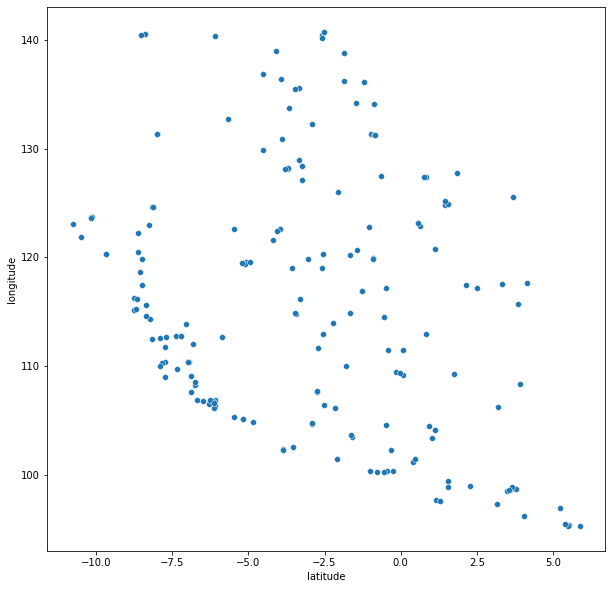

In [14]:
f,ax = plt.subplots(figsize = (10,10))

sns.scatterplot(data = cm_sd, x = 'latitude',y = 'longitude')

In [15]:
cm_re[(cm_re['date'] == '2010-01-04')]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3899,2010-01-04,23.0,30.0,26.2,86.0,14.0,2.0,3.0,315.0,2.0,NW,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
7898,2010-01-04,24.0,31.2,26.8,88.0,NaN,1.1,6.0,135.0,2.0,S,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
11610,2010-01-04,20.7,30.0,25.9,88.0,0.0,0.1,3.0,0.0,0.0,SW,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Kab. Nagan Raya,4.04928,96.24796,15,1
15610,2010-01-04,24.0,31.2,26.9,88.0,12.0,1.3,3.0,360.0,4.0,SE,96017,Stasiun Klimatologi Aceh,Kab. Aceh Besar,5.40400,95.46400,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571818,2010-01-04,23.0,33.8,27.2,88.0,21.6,4.5,13.0,90.0,6.0,N,97796,Stasiun Meteorologi Mozez Kilangin,Kab. Mimika,-4.53006,136.89348,466,32
575730,2010-01-04,27.4,31.4,29.0,79.0,1.0,5.0,8.0,315.0,5.0,NW,97810,Stasiun Meteorologi Karel Sadsuitubun,Kab. Maluku Tenggara,-5.66370,132.73620,439,30
579287,2010-01-04,24.0,33.0,26.1,92.0,25.0,0.0,3.0,0.0,2.0,NE,97876,Stasiun Meteorologi Tanah Merah,Kab. Boven Digoel,-6.10000,140.31000,473,32
582047,2010-01-04,25.0,31.0,27.9,85.0,0.0,1.2,10.0,270.0,6.0,N,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.98000,131.30000,440,30


In [16]:
cm.dropna().head(10)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001
7,2010-01-08,21.8,29.8,26.8,91.0,3.0,0.6,5.0,90.0,4.0,E,96001
8,2010-01-09,21.8,30.2,26.7,92.0,3.0,0.7,4.0,90.0,3.0,E,96001
9,2010-01-10,20.0,30.2,27.1,88.0,28.0,0.6,5.0,90.0,4.0,E,96001
10,2010-01-11,20.0,30.2,25.7,92.0,4.0,0.6,4.0,90.0,3.0,E,96001
11,2010-01-12,23.4,30.2,27.3,85.0,0.0,0.6,3.0,45.0,3.0,NE,96001
12,2010-01-13,21.8,30.2,26.9,82.0,0.0,0.2,4.0,90.0,3.0,E,96001


In [17]:
#5.87655
cm_1 = cm_re[(cm_re['latitude'] >5.0) & (cm_re['date'] == '2010-01-05')]
cm_1[~cm_1['ff_x'].isnull()]['ff_x'].mean().round(2)

5.67

In [18]:
cm.isnull().sum()

date               0
Tn             23383
Tx             37736
Tavg           45105
RH_avg         48182
RR            125384
ss             43721
ff_x           10214
ddd_x          13128
ff_avg         10127
ddd_car        13739
station_id         0
dtype: int64

In [19]:
cm.loc[[4],[cm.loc[[4]].isnull()]]

ValueError: Buffer has wrong number of dimensions (expected 1, got 3)

In [ ]:
cm[cm['ff_x'].isnull()]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001
5,2010-01-06,21.2,30.0,26.1,93.0,11.0,0.3,NaN,NaN,NaN,NaN,96001
6,2010-01-07,21.4,29.0,25.4,96.0,2.0,0.1,NaN,NaN,NaN,NaN,96001
20,2010-01-21,20.2,30.0,25.5,92.0,0.0,0.4,NaN,NaN,NaN,NaN,96001
34,2010-02-04,21.0,30.6,26.6,88.0,0.0,0.6,NaN,NaN,NaN,NaN,96001
...,...,...,...,...,...,...,...,...,...,...,...,...
587400,2014-12-28,26.0,33.3,28.8,NaN,6.5,0.3,NaN,NaN,NaN,NaN,97980
587401,2014-12-29,26.0,30.4,27.8,NaN,7.2,0.0,NaN,NaN,NaN,NaN,97980
587402,2014-12-30,26.0,31.4,28.3,NaN,8.5,0.0,NaN,NaN,NaN,NaN,97980
587403,2014-12-31,24.0,31.6,27.5,NaN,10.4,0.5,NaN,NaN,NaN,NaN,97980


In [8]:
cm.loc[4].reset_index()[cm.loc[4].reset_index()[4].isnull()]['index'].tolist()

['ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

In [ ]:
cm_re.head(4)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


In [ ]:
cm_re.loc[[4],['latitude','longitude']].loc[4]['longitude']

95.33785

In [ ]:
cm_re[cm_re['latitude'] == cm_re.loc[[4],['latitude','longitude']].loc[4]['latitude']]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
0,2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
1,2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
2,2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3,2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3891,2020-12-27,23.6,30.0,27.0,86.0,0.0,0.3,3.0,130.0,1.0,C,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3892,2020-12-28,NaN,30.4,26.5,86.0,11.7,8.0,3.0,80.0,0.0,C,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3893,2020-12-29,24.0,30.0,26.7,86.0,NaN,4.5,4.0,100.0,3.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3894,2020-12-30,24.6,30.0,27.0,84.0,0.0,5.0,6.0,100.0,3.0,E,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1


In [33]:
cm.loc[4].reset_index()[cm.loc[4].reset_index()[4].isnull()]['index'].tolist()

['ff_x', 'ddd_x', 'ff_avg', 'ddd_car']

In [32]:
cm_re[(cm_re['date'] == '2010-01-05')&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)].fillna({'RR':cm_re[(cm_re['date'] == '2010-01-05')&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)]['RR'].mean()} )

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
4,2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,NaN,NaN,NaN,NaN,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
7899,2010-01-05,24.0,30.6,25.5,91.0,2.0,2.8,8.0,135.0,2.0,NE,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
15611,2010-01-05,23.0,32.6,24.7,89.0,2.0,4.8,5.0,180.0,2.0,N,96017,Stasiun Klimatologi Aceh,Kab. Aceh Besar,5.40400,95.46400,6,1


In [62]:
#원본 
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)].fillna({j:cm_re[(cm_re['date'] == i)&(cm_re['latitude'] >= 5.87655 - 0.5)&(cm_re['latitude'] <= 5.87655 + 0.5)][j].mean()},inplace = True)

KeyboardInterrupt: 

In [18]:
# 주의사항 cm에 ddd_car컬럼 삭제, date 컬럼 문자형 변형
#완성본 (153m22.2s)
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)][j].mean()})

In [13]:
# 10번 인덱스 까지
for i in range(0,10):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['latitude'] >= cm_re.iloc[i]['latitude'] - 0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude'] + 0.5)][j].mean()})

In [7]:
cm = cm.drop(columns= 'ddd_car')

In [12]:
cm['date'] = cm['date'].astype(str)

In [9]:
cm_re.isnull().sum()

date                 0
Tn               23383
Tx               37736
Tavg             45105
RH_avg           48182
RR              125384
ss               43721
ff_x             10214
ddd_x            13128
ff_avg           10127
ddd_car          13739
station_id           0
station_name         0
region_name          0
latitude             0
longitude            0
region_id            0
province_id          0
dtype: int64

In [19]:
cm_re.isnull().sum()

date                0
Tn                 31
Tx                 52
Tavg               68
RH_avg             68
RR               1496
ss                103
ff_x                1
ddd_x               0
ff_avg             24
ddd_car         13739
station_id          0
station_name        0
region_name         0
latitude            0
longitude           0
region_id           0
province_id         0
dtype: int64

In [32]:
# 경도에서 평균을 잡을수 없어 위도에서 잡음 (156m1.1s)
for i in range(0,len(cm_re)):
    cm_null_col = cm.loc[i].reset_index()[cm.loc[i].reset_index()[i].isnull()]['index'].tolist()
    for j in cm_null_col:
        cm_re.loc[[i]] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['longitude'] >= cm_re.iloc[i]['longitude'] - 0.5)&(cm_re['longitude'] <= cm_re.iloc[i]['longitude'] + 0.5)].fillna({j:cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])&(cm_re['longitude'] >= cm_re.iloc[i]['longitude'] - 0.5)&(cm_re['longitude'] <= cm_re.iloc[i]['longitude'] + 0.5)][j].mean()})

In [33]:
cm_re.isnull().sum()

date                0
Tn                  4
Tx                  2
Tavg                2
RH_avg              2
RR                320
ss                  9
ff_x                0
ddd_x               0
ff_avg              0
ddd_car         13739
station_id          0
station_name        0
region_name         0
latitude            0
longitude           0
region_id           0
province_id         0
dtype: int64

In [34]:
cm_re.to_csv('climate_re_re.csv')

In [155]:
cm_re = pd.read_csv("climate_re_re.csv")

In [158]:
cm_re = cm_re.drop(columns= 'ddd_car')

In [188]:
cm_re.isnull().sum()

Unnamed: 0        0
date              0
Tn                0
Tx                0
Tavg              2
RH_avg            2
RR              194
ss                4
ff_x              0
ddd_x             0
ff_avg            0
station_id        0
station_name      0
region_name       0
latitude          0
longitude         0
region_id         0
province_id       0
dtype: int64

In [169]:
cm_re_Tn_na = cm_re[cm_re['Tn'].isnull()]['Unnamed: 0'].tolist()
cm_re_Tn_na

[]

In [180]:
cm_re_Tx_na = cm_re[cm_re['Tx'].isnull()]['Unnamed: 0'].tolist()
cm_re_Tx_na

[]

In [184]:
cm_re_RH_na = cm_re[cm_re['RH_avg'].isnull()]['Unnamed: 0'].tolist()
cm_re_RH_na

[480083, 480084]

In [183]:
cm_re_RR_na =  cm_re[cm_re['RR'].isnull()].reset_index()['Unnamed: 0'].tolist()
cm_re_RR_na

[1597,
 1664,
 1758,
 1759,
 1762,
 1773,
 1784,
 1786,
 1849,
 1865,
 1872,
 1892,
 1898,
 1922,
 1932,
 1958,
 1983,
 2012,
 2026,
 2033,
 2072,
 2086,
 2117,
 2154,
 2201,
 2392,
 2544,
 2571,
 2607,
 2613,
 2620,
 2621,
 2647,
 2692,
 2714,
 2747,
 2749,
 2771,
 2799,
 2821,
 2822,
 2826,
 2833,
 2840,
 2851,
 2857,
 2880,
 2888,
 2892,
 2903,
 2905,
 2906,
 2917,
 2935,
 2964,
 3000,
 3018,
 3029,
 3030,
 3054,
 3073,
 3074,
 3081,
 3092,
 3133,
 3153,
 3165,
 3177,
 3178,
 3184,
 3185,
 3187,
 3198,
 3624,
 3773,
 5781,
 5783,
 6799,
 6821,
 6822,
 6826,
 6833,
 6840,
 6851,
 6857,
 6880,
 6888,
 6892,
 6903,
 6905,
 6906,
 6917,
 6935,
 6963,
 6999,
 7017,
 7028,
 7029,
 7053,
 7072,
 7073,
 7080,
 7091,
 7132,
 7152,
 7164,
 7176,
 7177,
 7183,
 7184,
 7186,
 7197,
 7620,
 7739,
 7772,
 9758,
 9760,
 10600,
 10617,
 10618,
 10621,
 10628,
 10634,
 10645,
 10666,
 10672,
 10676,
 10683,
 10684,
 10687,
 10738,
 10756,
 10767,
 10768,
 10792,
 10809,
 10810,
 10817,
 10828,
 1086

In [172]:
cm_re_ss_na =  cm_re[cm_re['ss'].isnull()].reset_index()['Unnamed: 0'].tolist()
cm_re_ss_na

[306776, 306777, 306778, 479789, 479790, 479795, 479847, 480084, 480381]

In [100]:
cm_re[(cm_re['date'] == '2014-05-18')& (cm_re['latitude'] >= 5.87655 -1.5)&(cm_re['latitude'] <= 5.87655	+ 1.5)]

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
1597,2014-05-18,20.2,33.0,28.05,79.0,NaN,0.3,6.0,200.0,2.0,N,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
5494,2014-05-18,25.0,31.2,27.60,88.0,0.0,0.6,4.0,120.0,0.0,N,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
9492,2014-05-18,24.0,33.2,28.30,77.0,NaN,0.1,6.0,240.0,3.0,SE,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
17204,2014-05-18,24.0,33.0,27.80,81.0,NaN,0.5,5.0,340.0,0.0,N,96017,Stasiun Klimatologi Aceh,Kab. Aceh Besar,5.40400,95.46400,6,1


In [93]:
cm_re[cm_re['date'] == '2013-09-06']

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car,station_id,station_name,region_name,latitude,longitude,region_id,province_id
1343,2013-09-06,16.8,29.8,24.600000,90.0,12.700000,0.0,6.0,230.0,4.0,SW,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
5240,2013-09-06,23.0,28.6,25.600000,85.0,0.000000,0.4,4.0,290.0,3.0,W,96009,Stasiun Meteorologi Malikussaleh,Kab. Aceh Utara,5.22869,96.94749,8,1
9238,2013-09-06,22.0,30.4,25.600000,72.0,4.233333,0.0,11.0,250.0,4.0,SE,96011,Stasiun Meteorologi Sultan Iskandar Muda,Kab. Aceh Besar,5.52244,95.41700,6,1
12951,2013-09-06,21.5,26.4,23.400000,95.0,37.100000,0.0,8.0,220.0,2.0,NE,96015,Stasiun Meteorologi Cut Nyak Dhien Nagan Raya,Kab. Nagan Raya,4.04928,96.24796,15,1
16950,2013-09-06,23.0,28.4,24.700000,81.0,0.000000,0.0,5.0,230.0,2.0,SW,96017,Stasiun Klimatologi Aceh,Kab. Aceh Besar,5.40400,95.46400,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547681,2013-09-06,23.0,29.8,26.900000,77.0,0.000000,6.7,8.0,130.0,5.0,SE,97700,Stasiun Meteorologi Namlea,Kab. Buru,-3.25000,127.08000,441,30
566751,2013-09-06,14.0,24.9,24.683333,81.0,0.000000,8.0,4.0,280.0,3.0,N,97780,Stasiun Meteorologi Enarotali,Kab. Paniai,-3.92688,136.38000,465,32
573143,2013-09-06,24.0,28.6,25.800000,83.0,0.133333,5.5,5.0,120.0,1.0,N,97796,Stasiun Meteorologi Mozez Kilangin,Kab. Mimika,-4.53006,136.89348,466,32
580471,2013-09-06,23.0,29.6,25.600000,74.0,3.867188,4.0,5.0,90.0,3.0,SE,97876,Stasiun Meteorologi Tanah Merah,Kab. Boven Digoel,-6.10000,140.31000,473,32


In [96]:
cm_re.loc[[480084],['ss']] = cm_re.loc[[480084],['ss']].fillna(76.0)

In [185]:
for i in cm_re_RH_na:
    cm_re.loc[[i],['RH_avg']] = cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])& (cm_re['latitude'] >= cm_re.iloc[i]['latitude']-0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude']+0.5)]['RH_avg'].fillna(cm_re[(cm_re['date'] == cm_re.iloc[i]['date'])& (cm_re['latitude'] >= cm_re.iloc[i]['latitude']-0.5)&(cm_re['latitude'] <= cm_re.iloc[i]['latitude']+0.5)]['RH_avg'].mean())

In [170]:
cm_re.loc[[480084],['Tx']] = cm_re[(cm_re['date'] == cm_re.iloc[480083]['date'])& (cm_re['latitude'] >= cm_re.iloc[480083]['latitude']-0.5)&(cm_re['latitude'] <= cm_re.iloc[480083]['latitude']+0.5)]['Tx'].fillna(cm_re[(cm_re['date'] == cm_re.iloc[480083]['date'])& (cm_re['latitude'] >= cm_re.iloc[480083]['latitude']-0.5)&(cm_re['latitude'] <= cm_re.iloc[480083]['latitude']+0.5)]['Tx'].mean())

,Unnamed: 0,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,station_name,region_name,latitude,longitude,region_id,province_id
480083,480083,2013-09-04,25.0,NaN,NaN,NaN,NaN,9.4,4.0,80.0,4.0,97372,Stasiun Meteorologi Eltari,Kota Kupang,-10.1678,123.67039,309,19


In [189]:
cm_re = cm_re.dropna(axis = 0)

In [191]:
cm_re = cm_re.drop(columns= 'Unnamed: 0')

In [192]:
cm_re.isnull().sum()

date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
station_id      0
station_name    0
region_name     0
latitude        0
longitude       0
region_id       0
province_id     0
dtype: int64

In [193]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.4/7.4 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 40.2/40.2 MB 6.4 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 KB 2.6 MB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'


You should consider upgrading via the 'C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [194]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [415]:
y_target = cm_re['Tn']
X_data = cm_re.drop(['Tn'], axis  =1,inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size =0.2, random_state= 42)


In [414]:
# n_estimators : forest 안에 몇개의 트리모델을 사용할 것인가?
rf = RandomForestRegressor(random_state= 42, n_estimators= 250)

In [331]:
cross_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error',cv=5)
rmse_score = np.sqrt(-1*cross_scores)
avg_rmse = np.mean(rmse_score)

print("랜포모델의 훈련데이터에 대한 성능:")
print( '5fold의 개별 rmse : ',np.round(rmse_score,2))
print('5fold의 평균 rmse : {0:.3f}'.format(avg_rmse))

랜포모델의 훈련데이터에 대한 성능:
5fold의 개별 rmse :  [0.93 0.87 0.85 0.94 0.94]
5fold의 평균 rmse : 0.904


In [416]:
rf.fit(X_train,y_train)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

ValueError: could not convert string to float: '2010-12-23'

In [441]:
cm_ks = cm_re[cm_re['region_name'] == 'Kota Sabang'].sort_values(by = 'date', ascending = True)

In [284]:
cm_ks.columns

Index(['date', 'Tn', 'Tx', 'Tavg', 'RH_avg', 'RR', 'ss', 'ff_x', 'ddd_x',
       'ff_avg', 'station_id', 'latitude', 'longitude', 'region_id',
       'province_id'],
      dtype='object')

In [424]:
y_target = cm_ks['Tn']
X_data = cm_ks.drop(['Tn'], axis  =1,inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size =0.2, random_state= 100)


In [425]:
rf.fit(X_train,y_train)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9802894817493005
0.8467166108368491


In [356]:
cross_scores = cross_val_score(rf, X_train, y_train, scoring = 'neg_mean_squared_error',cv = 5)
rmse_scores = np.sqrt(-1 * cross_scores)
avg_rmse = np.mean(rmse_scores)

print("Random Forest 모델의 훈련 데이터에 대한 성능 : ")
print("5 folds의 개별 Rmse : ", np.round(rmse_scores,2))
print("5folds의 평균 RMSE : {:.3f}".format(avg_rmse))


Random Forest 모델의 훈련 데이터에 대한 성능 : 
5 folds의 개별 Rmse :  [12.57 11.64 15.35 11.78 12.7 ]
5folds의 평균 RMSE : 12.809


In [265]:
cm_ks[cm_ks['date'] == '2015-12-10'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 2065 to 2065
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1 non-null      object 
 1   Tn            1 non-null      float64
 2   Tx            1 non-null      float64
 3   Tavg          1 non-null      float64
 4   RH_avg        1 non-null      float64
 5   RR            1 non-null      float64
 6   ss            1 non-null      float64
 7   ff_x          1 non-null      float64
 8   ddd_x         1 non-null      float64
 9   ff_avg        1 non-null      float64
 10  station_id    1 non-null      int64  
 11  station_name  1 non-null      object 
 12  region_name   1 non-null      object 
 13  latitude      1 non-null      float64
 14  longitude     1 non-null      float64
 15  region_id     1 non-null      int64  
 16  province_id   1 non-null      int64  
dtypes: float64(11), int64(3), object(3)
memory usage: 144.0+ bytes


In [445]:
cm_ks = cm_ks.drop(['station_name','region_name'], axis = 1)

In [443]:
cm_ks['date'] = cm_ks['date'].str.replace("-", "")

In [444]:
cm_ks['date'] = cm_ks['date'].astype(str)

In [421]:
cm_re.sort_values(by = ['region_name','date'], ascending= True)

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,station_name,region_name,latitude,longitude,region_id,province_id
582044,2010-01-01,27.0,30.8,28.5,86.0,0.0,0.0,4.0,360.0,2.0,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.9800,131.30,440,30
582045,2010-01-02,26.0,29.0,26.9,91.0,0.0,0.0,7.0,360.0,3.0,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.9800,131.30,440,30
582046,2010-01-03,25.0,30.3,27.2,88.0,0.0,0.2,7.0,360.0,5.0,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.9800,131.30,440,30
582047,2010-01-04,25.0,31.0,27.9,85.0,0.0,1.2,10.0,270.0,6.0,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.9800,131.30,440,30
582048,2010-01-05,26.0,32.8,28.8,84.0,0.0,6.1,8.0,315.0,4.0,97900,Stasiun Meteorologi Mathilda Batlayeri,Kab Maluku Tenggara Barat,-7.9800,131.30,440,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499574,2020-12-27,24.4,29.4,26.6,88.0,3.0,0.0,4.0,130.0,2.0,97430,Stasiun Meteorologi Sultan Babullah,Kota Ternate,0.8333,127.38,456,31
499575,2020-12-28,24.0,30.2,27.8,86.0,0.0,1.0,5.0,340.0,2.0,97430,Stasiun Meteorologi Sultan Babullah,Kota Ternate,0.8333,127.38,456,31
499576,2020-12-29,24.4,30.8,27.0,84.0,15.7,1.6,5.0,320.0,3.0,97430,Stasiun Meteorologi Sultan Babullah,Kota Ternate,0.8333,127.38,456,31
499577,2020-12-30,24.4,30.6,27.1,87.0,0.0,4.1,7.0,330.0,3.0,97430,Stasiun Meteorologi Sultan Babullah,Kota Ternate,0.8333,127.38,456,31


In [448]:
cm_ks = cm_ks.drop(['station_id','latitude','longitude','region_id','province_id'], axis = 1)

<AxesSubplot: >

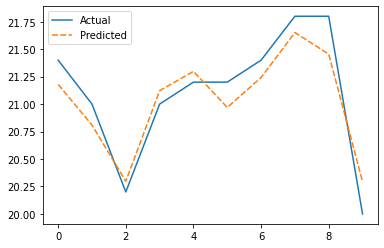

In [428]:
y_test_preds = rf.predict(X_data).round(3)

df1 = pd.DataFrame({'Actual': y_target, 'Predicted' : y_test_preds})
df2 = df1.head(10)
sns.lineplot(data = df2)

X_data에는 예측하고 싶은 컬럼이외에 커럼들을 조합  
y_target에는 내가 예측하고 싶은 변수  
거기에 X_data에 날짜를 넣으면 에측이 되는가?

입력값을 기존데이터로 넣고
출력값을 예측하고 싶은 날짜로 하면 되는건가?  
출력값 : y  y_taret 예측하고 싶은 날의 컬럼 항목?  
입력값 : x  X_data 기존 데이터? + 예측하고 싶은 날짜컬럼  

결론 랜덤포레스트로는 데이터 예측이 불가능하고  
집값측정과 같이 하나의 컬럼을 모르고 나머지컬럼값을 알고 있을때 가능하다

,date,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,20100101,30.2,27.1,82.0,9.00,0.5,7.0,90.0,5.0
1,20100102,29.6,25.7,95.0,24.00,0.2,6.0,90.0,4.0
2,20100103,26.8,24.5,98.0,63.00,0.0,5.0,90.0,4.0
3,20100104,29.2,25.8,90.0,0.00,0.1,4.0,225.0,3.0
4,20100105,30.0,26.7,90.0,2.00,0.4,6.5,157.5,2.0
...,...,...,...,...,...,...,...,...,...
3891,20201227,30.0,27.0,86.0,0.00,0.3,3.0,130.0,1.0
3892,20201228,30.4,26.5,86.0,11.70,8.0,3.0,80.0,0.0
3893,20201229,30.0,26.7,86.0,5.45,4.5,4.0,100.0,3.0
3894,20201230,30.0,27.0,84.0,0.00,5.0,6.0,100.0,3.0


In [451]:
for i in range(20210101,20210132):
    new_data = { 'date' : i }
    cm_ks_1 = cm_ks_1.append(new_data,ignore_index=True)

C:\Users\User\AppData\Local\Temp\ipykernel_13516\4009696299.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm_ks_1 = cm_ks_1.append(new_data,ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13516\4009696299.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm_ks_1 = cm_ks_1.append(new_data,ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13516\4009696299.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm_ks_1 = cm_ks_1.append(new_data,ignore_index=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13516\4009696299.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm_ks_1 = cm_ks_1.append(new_data,ign

In [459]:
y_target_1 = cm_ks_1['Tn']
y_target =  cm_ks['Tn']
X_data = cm_ks.drop(['Tn'], axis  =1,inplace = False)

#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,test_size =0.2, random_state= 100)


In [460]:
rf.fit(X_data,y_target)

#print(rf.score(X_train,y_train))
#print(rf.score(X_test,y_test))

RandomForestRegressor(n_estimators=250, random_state=42)

In [486]:
y_test_preds = rf.predict(X_data_1[['date']]).round(3)
y_test_preds

#df1 = pd.DataFrame({'Actual': y_target, 'Predicted' : y_test_preds})
#pd.DataFrame({'Actual': y_target, 'Predicted' : y_test_preds})
#df2 = df1.head(10)
#sns.lineplot(data = df2)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names seen at fit time, yet now missing:
- RH_avg
- RR
- Tavg
- Tx
- ddd_x
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 1 features, but RandomForestRegressor is expecting 9 features as input.

In [466]:
X_data_1

,date,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
0,20100101,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0
1,20100102,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0
2,20100103,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0
3,20100104,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0
4,20100105,30.0,26.7,90.0,2.0,0.4,6.5,157.5,2.0
...,...,...,...,...,...,...,...,...,...
3847,20210127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3848,20210128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3849,20210129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3850,20210130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [475]:
X_data_2['date'] = X_data_2['date'].astype(int)

In [484]:
X_data_2[X_data_2['date'] >= 20210101][['date']]

,date
3821,20210101
3822,20210102
3823,20210103
3824,20210104
3825,20210105
3826,20210106
3827,20210107
3828,20210108
3829,20210109
3830,20210110


In [5]:
cm = pd.read_csv("climate_re_re_re.csv",index_col= 0)

In [3]:
cm.isnull().sum()

Unnamed: 0      0
date            0
Tn              0
Tx              0
Tavg            0
RH_avg          0
RR              0
ss              0
ff_x            0
ddd_x           0
ff_avg          0
station_id      0
station_name    0
region_name     0
latitude        0
longitude       0
region_id       0
province_id     0
dtype: int64

In [9]:
cm_ks = cm[cm['region_name'] == 'Kota Sabang']

In [13]:
cm_ks = cm_ks.sort_values(by = 'date')

In [25]:
cm_train = cm_ks.iloc[:-12]

In [53]:
cm_test = cm_ks.iloc[-12:]

In [26]:
cm_train.shape[0]

3809

In [31]:
#cm_train = cm_train.drop(columns=['station_name','station_id','latitude','longitude','region_name','region_id','province_id'])
cm_train.set_index(['date'])

,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg
date,,,,,,,,,
2010-01-01,21.4,30.2,27.1,82.0,9.0,0.5,7.0,90.0,5.0
2010-01-02,21.0,29.6,25.7,95.0,24.0,0.2,6.0,90.0,4.0
2010-01-03,20.2,26.8,24.5,98.0,63.0,0.0,5.0,90.0,4.0
2010-01-04,21.0,29.2,25.8,90.0,0.0,0.1,4.0,225.0,3.0
2010-01-05,21.2,30.0,26.7,90.0,2.0,0.4,6.5,157.5,2.0
...,...,...,...,...,...,...,...,...,...
2020-12-15,24.2,29.2,26.1,90.0,0.0,6.0,6.0,110.0,2.0
2020-12-16,23.0,29.6,26.1,88.0,13.5,1.0,0.0,0.0,0.0
2020-12-17,22.6,27.6,24.5,92.0,16.6,2.5,9.0,150.0,4.0


In [15]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 5.2 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 KB 2.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\User\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [16]:
from statsmodels.tsa.api import ExponentialSmoothing

In [37]:
cm_train = cm_train.set_index(['date'])

In [42]:
cm_train.index.freq = 'MS'

In [44]:
cm_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3809 entries, 2010-01-01 to 2020-12-19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tn      3809 non-null   float64
 1   Tx      3809 non-null   float64
 2   Tavg    3809 non-null   float64
 3   RH_avg  3809 non-null   float64
 4   RR      3809 non-null   float64
 5   ss      3809 non-null   float64
 6   ff_x    3809 non-null   float64
 7   ddd_x   3809 non-null   float64
 8   ff_avg  3809 non-null   float64
dtypes: float64(9)
memory usage: 297.6+ KB


In [67]:
cm_train.index = pd.to_datetime(cm_train.index)

In [101]:
cm_train['TES'] = ExponentialSmoothing(cm_train['Tavg'],trend='add',seasonal= 'mul',seasonal_periods=300).fit().fittedvalues.shift(-1)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<AxesSubplot: xlabel='date'>

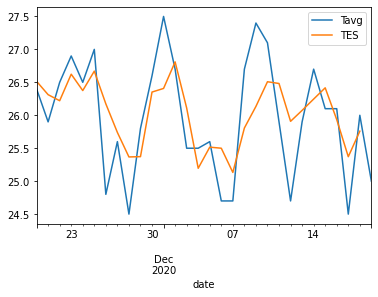

In [102]:
cm_train[['Tavg','TES']].iloc[-30:].plot()

In [110]:
fit_1 = ExponentialSmoothing(cm_train['Tavg'],trend='add',seasonal= 'mul',seasonal_periods=365).fit()

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [95]:
fit_1

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot: >

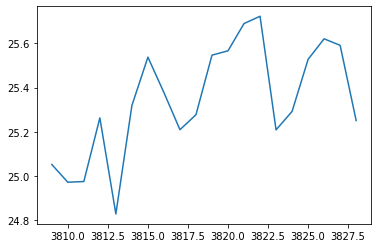

In [111]:
forcast_1 = fit_1.forecast(20)
forcast_1.plot()

<AxesSubplot: >

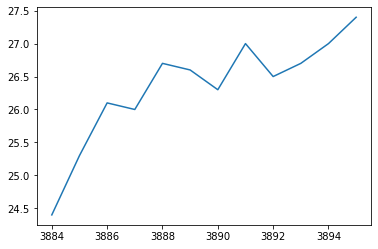

In [76]:
cm_test['Tavg'].plot()

In [77]:
forcast_1

3809    25.432106
3810    25.501226
3811    25.458120
3812    25.498802
3813    25.444724
3814    25.479884
3815    25.431065
3816    25.500183
3817    25.457078
3818    25.497759
3819    25.443683
3820    25.478842
dtype: float64

In [57]:
cm_test

,date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,station_id,station_name,region_name,latitude,longitude,region_id,province_id
3884,2020-12-20,23.6,25.8,24.4,96.0,26.60,0.0,9.0,140.0,5.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3885,2020-12-21,23.6,28.8,25.3,91.0,38.50,0.0,6.0,140.0,4.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3886,2020-12-22,23.2,29.0,26.1,89.0,21.30,0.0,7.0,150.0,3.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3887,2020-12-23,23.6,29.4,26.0,86.0,0.00,2.5,4.0,120.0,3.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3888,2020-12-24,24.4,30.0,26.7,81.0,0.00,7.0,5.0,90.0,2.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3889,2020-12-25,24.0,29.0,26.6,88.0,1.50,6.0,4.0,150.0,1.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3890,2020-12-26,23.4,29.8,26.3,86.0,52.10,2.0,0.0,0.0,0.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3891,2020-12-27,23.6,30.0,27.0,86.0,0.00,0.3,3.0,130.0,1.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3892,2020-12-28,23.2,30.4,26.5,86.0,11.70,8.0,3.0,80.0,0.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
3893,2020-12-29,24.0,30.0,26.7,86.0,5.45,4.5,4.0,100.0,3.0,96001,Stasiun Meteorologi Maimun Saleh,Kota Sabang,5.87655,95.33785,20,1
